In [1]:
import numpy as np
import fipy
import matplotlib.pyplot as plt

In [2]:
from fipy import Grid1D, CellVariable
from fipy import TransientTerm, DiffusionTerm

In [3]:
# parameters
## physics
L = 1.0
U_H = 1.0
U_L = 0
alpha = 1.0
## FVM
N = 100
dt = 0.00005 # set very small step (larger steps results in heat transfer accross a slab situation)
Nt = 200

In [4]:
# define grid
dx = L/N
msh = Grid1D(dx=dx, nx=N)

In [5]:
xcc = msh.cellCenters.value[0]

In [6]:
# define cell variables
u = CellVariable(mesh = msh, value = 0.0)

In [7]:
# set BC
# Dirichlet BCs
u.constrain(value = U_H, where = msh.facesLeft)
u.constrain(value = U_L, where = msh.facesRight)

In [8]:
uval = u.value

Text(0.5, 0, 'x')

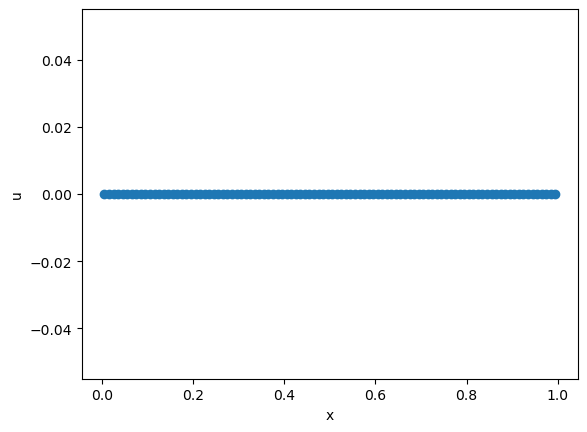

In [9]:
plt.plot(xcc, uval,'o')
plt.ylabel('u')
plt.xlabel('x')

In [10]:
# set IC
uval[xcc < L/2] = U_H
uval[xcc >= L/2] = U_L

Text(0.5, 0, 'x')

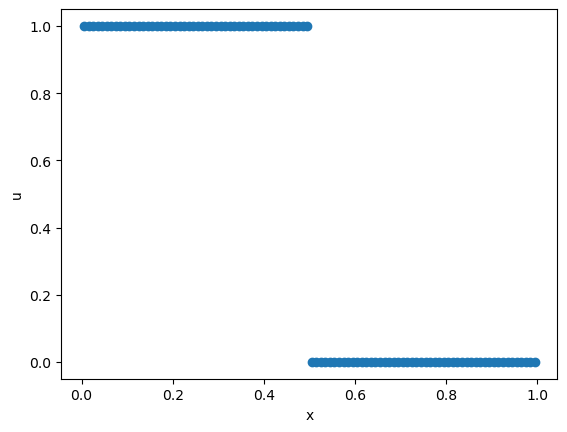

In [11]:
plt.plot(xcc, uval,'o')
plt.ylabel('u')
plt.xlabel('x')

In [12]:
np.sum(uval * dx)

0.5

In [13]:
# define PDE
eqn = TransientTerm(var = u) == DiffusionTerm(var = u, coeff = alpha)

Text(0.5, 0, 'x')

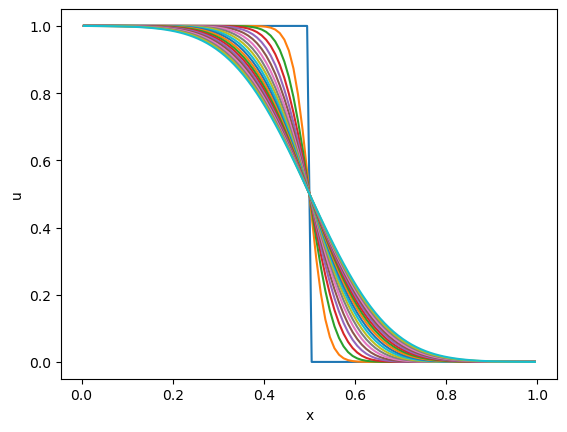

In [14]:
# SOLVE and sample the solution
for n in range(Nt):
    if n%10 == 0:
        plt.plot(xcc, uval)
    eqn.solve(dt=dt)
plt.ylabel('u')
plt.xlabel('x')